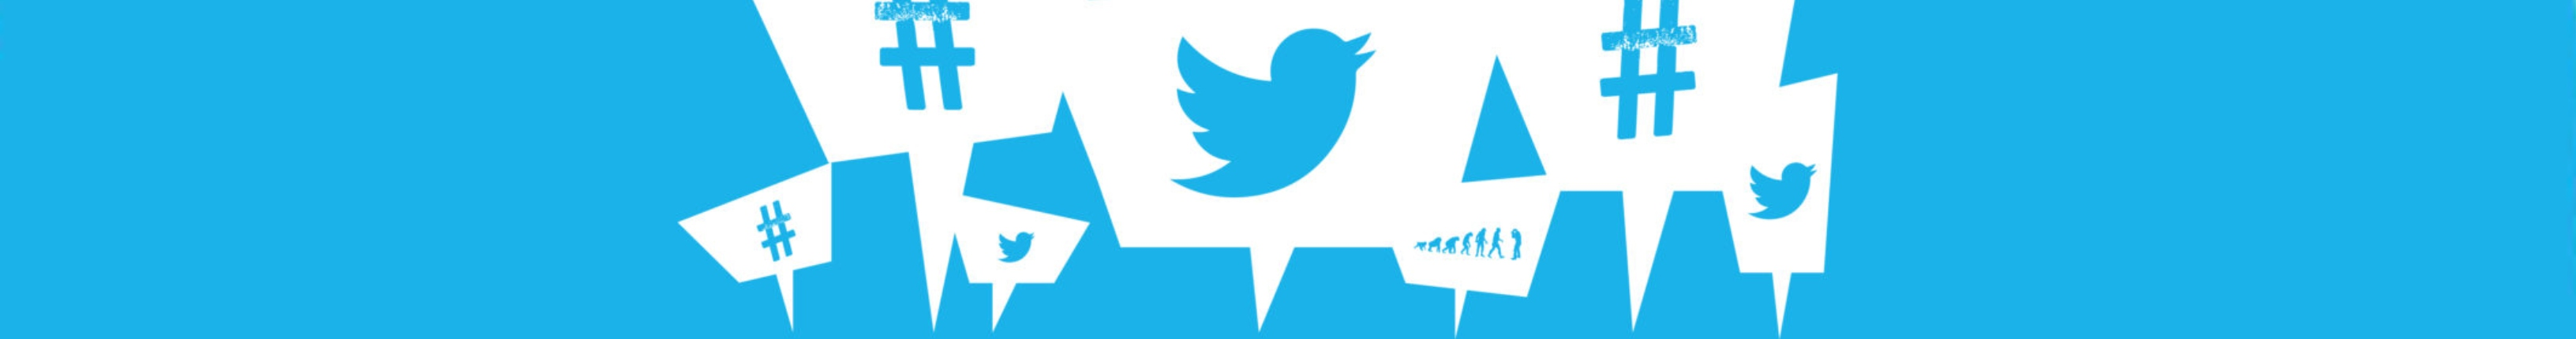

# <span style='background :#1bb2e9; color :#ffffff' > Importing libraries </span>   

In [35]:
import pandas as pd
import numpy as np
import re
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from simple_colors import *

***

# <span style='background :#1bb2e9; color :#ffffff' > Uploading the dataset </span>   

In [5]:
cols = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']
data = pd.read_csv('sentiment dataset 1.6m tweets.csv', encoding = 'latin-1', names = cols)

In [7]:
data.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


***

# <span style='background :#1bb2e9; color :#ffffff' > Preprocessing </span>   

In [20]:
# Only taking the necessary columns
data = data[['sentiment','text']]

# Replacing the sentiment values from 4 to 1
# so negative gets 0 and positive gets 1
data['sentiment'] = data['sentiment'].replace(4, 1)

In [26]:
p = PorterStemmer()
def cleaning(data):
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = data.lower()
    data = data.split()
    data = [p.stem(word) for word in data if not word in stopwords.words('english')]
    data = ' '.join(data)
    return data

In [27]:
data['text'] = data['text'].apply(cleaning)

In [28]:
data.head()

,sentiment,text
0,0,switchfoot http twitpic com zl awww bummer sho...
1,0,upset updat facebook text might cri result sch...
2,0,kenichan dive mani time ball manag save rest g...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav mad see


***

# <span style='background :#1bb2e9; color :#ffffff' > Splitting the dataset </span>   

In [29]:
x = data['text']
y = data['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [30]:
vect = TfidfVectorizer()
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)

***

# <span style='background :#1bb2e9; color :#ffffff' > Model Fitting </span>   
- Linear Support Vector Classification (Linear SVC)
- Logistic Regression (LR)

#### <span style='background :#1bb2e9; color :#ffffff' > Linear Support Vector Classification (Linear SVC) </span>   

Accuracy of SVC model is: 0.7692 


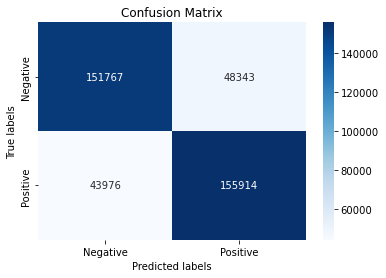

In [37]:
SVCmodel = LinearSVC()

# Fitting
SVCmodel.fit(xv_train, y_train)

# Predicting  
SVC_y_pred = SVCmodel.predict(xv_test)

# Calculating the accuracy 
score = accuracy_score(y_test, SVC_y_pred)
print('Accuracy of SVC model is: %0.4f ' % score)

# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, SVC_y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=plt.cm.Blues)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

#### <span style='background :#1bb2e9; color :#ffffff' > Logistic Regression (LR) </span>   


Accuracy of LR model is: 0.7778 


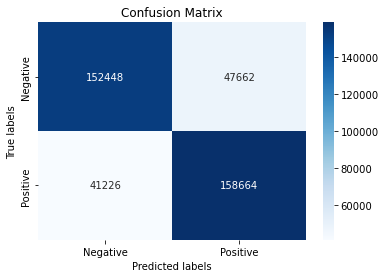

In [36]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)

# Fitting
LRmodel.fit(xv_train, y_train)

# Predicting  
LR_y_pred = LRmodel.predict(xv_test)

# Calculating the accuracy 
score = accuracy_score(y_test, LR_y_pred)
print('Accuracy of LR model is: %0.4f ' % score)

# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, LR_y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=plt.cm.Blues)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

***

# <span style='background :#1bb2e9; color :#ffffff' > Model Testing (LR Model) </span>   

In [38]:
def sentiment_analysis(Text):
    input_data = {'text':[Text]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test['text'] = new_def_test['text'].apply(cleaning) 
    new_x_test = new_def_test['text']
    vectorized_input_data = vect.transform(new_x_test)
    prediction = LRmodel.predict(vectorized_input_data)
    
    if prediction == 1:
        print(green('Positive Sentiment 👍 '))
    else:
        print(red('Negative Sentiment 👎 '))

In [39]:
print(black('Test 1 \n', ['bold']))
text = str(input())
print('\n')
sentiment_analysis(text)

Test 1 

Just going to cry myself to sleep after watching Marley and Me.


Negative Sentiment 👎 


In [40]:
print(black('Test 2 \n', ['bold']))
text = str(input())
print('\n')
sentiment_analysis(text)

Test 2 

I hate when I have to call and wake people up.


Negative Sentiment 👎 


In [43]:
print(black('Test 3 \n', ['bold']))
text = str(input())
print('\n')
sentiment_analysis(text)

Test 3 

Gonna and read new moon for the 3rd time!!! I can't get enough of the twilight series <3 <3


Positive Sentiment 👍 


In [44]:
print(black('Test 4 \n', ['bold']))
text = str(input())
print('\n')
sentiment_analysis(text)

Test 4 

@leiabox so what can you tell us about it? I'm totally geeking out right now


Positive Sentiment 👍 


***